In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading datasets
df = pd.read_csv('/content/train.csv')

In [3]:
#Identifying the Missing Values
missing_befor = df.isnull().sum()
print(missing_befor)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


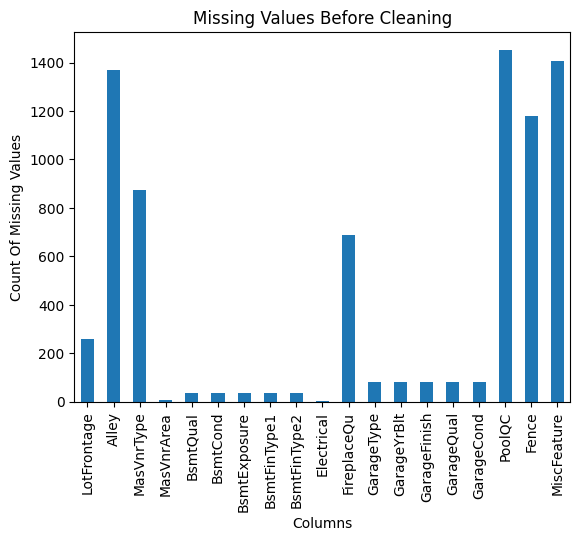

In [5]:
#Visualize missing data using bar chart
missing_befor[missing_befor > 0].plot(kind='bar')
plt.title("Missing Values Before Cleaning")
plt.xlabel("Columns")
plt.ylabel("Count Of Missing Values")
plt.show()

In [9]:
#Identifying Numerical Coloumns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

#applying Median Imputations
for col in numerical_columns:
  df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-1493080328.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [10]:
#Identifying the Categorical Columns Values
categorical_columns = df.select_dtypes(include=['object']).columns

# Applying  Mode Imputations
for col in categorical_columns:
  df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-2430183708.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [11]:
#Removing The Columns With More Than 40% Missing Data
threshold = 0.4
f = df.loc[:, df.isnull().mean() < threshold]

In [12]:
#Validating the Missing Values After Cleaning
missing_after = df.isnull().sum()
print(missing_after)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [15]:
# Compairing Before vs After Datasets size and Quality
original_df = pd.read_csv('/content/train.csv')
print("Before Cleaning")
print("Shape: ", original_df.shape)
print("Total Missing Values: ", original_df.isnull().sum().sum())

print("\nAfter Cleaning")
print("Shape: ", df.shape)
print("Total Missing Values: ", df.isnull().sum().sum())


Before Cleaning
Shape:  (1460, 81)
Total Missing Values:  7829

After Cleaning
Shape:  (1460, 81)
Total Missing Values:  0
